In [1]:
%matplotlib inline
import os
import numpy as np 
import cv2
import matplotlib.pyplot as plt
import pickle
import random
from time import time
import logging
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import roc_curve
from sklearn.datasets import load_wine
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_recall_curve
#from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn. metrics import f1_score
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from tabulate import tabulate

In [ ]:
dir = 'C:\\Users\\User10\\Desktop\\BITU 3973 PSM 1\\Waste Classification Using Instance-Based Algorithm\\WASTE IMAGE DATASET'

categories = ['O','R'] # 0 is O and 1 is R

data = []

for category in categories:
    path = os.path.join(dir,category)
    label = categories.index(category) # get zero and one (distinguish O and R)
    
    for img in os.listdir(path):
        imgpath = os.path.join(path,img)
        waste_image = cv2.imread(imgpath,0) # value 0 is to turn image into grayscale
        try:
            waste_image = cv2.resize(waste_image,(50,50)) # make all images same size
            image = np.array(waste_image).flatten() # make full image single area
            data.append([image,label]) # append image and label
        except Exception as e:
            pass

In [2]:
pick_in = open('data.pickle','wb') # create pickle to save data, wb means write
pickle.dump(data,pick_in) # dump data in pick_in
pick_in.close() # close the pickle

NameError: name 'data' is not defined

In [5]:
pick_in = open('data.pickle','rb') # read pickle file
data = pickle.load(pick_in) # load pick_in file
pick_in.close()

EOFError: Ran out of input

In [3]:
### SHUFFLE DATA
#takes a long time
random.shuffle(data)
features = []
labels = []

for feature, label in data:
    features.append(feature)
    labels.append(label)
    
### SPLIT DATA INTO TRAIN AND TEST SET
xtrain, xtest, ytrain, ytest = train_test_split(features,labels,test_size=0.25) #test size is 25% from dataset

NameError: name 'data' is not defined

In [ ]:
### FIND BEST K
## try K=1 through K=25 and record testing accuracy
k_range = range(1, 26)

# We can create Python dictionary using [] or dict()
scores = []

# We use a loop through the range 1 to 26
# We append the scores in the dictionary
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(xtrain, ytrain)
    ypred = knn.predict(xtest)
    scores.append(metrics.accuracy_score(ytest, ypred))

print(scores)

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [ ]:
### CREATE KNN MODEL
# instantiate the model with the best known parameters
knn = KNeighborsClassifier(n_neighbors=21) ### input best k in the n_neighbors
knn.fit(xtrain, ytrain)

In [ ]:
### CREATE SIMLPE SVM POLY MODEL
svm = SVC(C=1,kernel='poly',gamma='auto')
svm.fit(xtrain,ytrain) # give features and labels to train the model

### CREATE SVM RBF MODEL
svm_rbf = SVC(C=1,kernel='rbf',gamma='auto')
svm_rbf.fit(xtrain,ytrain) # give features and labels to train the model

In [ ]:
### CREATE Simple Naive Bayes Model
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
nb = gnb.fit(xtrain, ytrain)

#Predict the response for test dataset
ypred = nb.predict(xtest)

#Accuracy
print("Accuracy:",metrics.accuracy_score(ytest, ypred))

In [ ]:
### SAVE THE MODEL
### save the model first, bcs it'll take a long time

### SVM MODEL
pick = open('svm_model.sav','wb')
pickle.dump(svm,pick)
pick.close()

### SVM RBF BASED KERNEL
pick = open('svm_rbf_model.sav','wb')
pickle.dump(svm_rbf,pick)
pick.close()

### KNN MODEL
pick = open('knn_model.sav','wb')
pickle.dump(knn,pick)
pick.close()

### Save Naive Bayes MODEL
pick = open('nb_model.sav','wb')
pickle.dump(nb,pick)
pick.close()

In [6]:
###to use the model
pick = open('svm_model.sav','rb')
svm = pickle.load(pick)
pick.close()

pick = open('svm_rbf_model.sav','rb')
svm_rbf = pickle.load(pick)
pick.close()

pick = open('knn_model.sav','rb')
knn = pickle.load(pick)
pick.close()

pick = open('nb_model.sav','rb')
nb = pickle.load(pick)
pick.close()

In [8]:
### TESTING SVM MODEL
svm_prediction = svm.predict(xtest)
svm_accuracy = svm.score(xtest,ytest)
svm_precision = precision_score(ytest,svm_prediction)
svm_recall = recall_score(ytest,svm_prediction)
svm_f1_metric = f1_score(ytest,svm_prediction)

### TESTING SVM RBF BASED KERNEL
svm_rbf_prediction = svm_rbf.predict(xtest)
svm_rbf_accuracy = svm_rbf.score(xtest,ytest)
svm_rbf_precision = precision_score(ytest,svm_rbf_prediction)
svm_rbf_recall = recall_score(ytest,svm_rbf_prediction)
svm_rbf_f1_metric = f1_score(ytest,svm_rbf_prediction)

### TESTING KNN MODEL
knn_prediction = knn.predict(xtest)
knn_accuracy = knn.score(xtest,ytest)
knn_precision = precision_score(ytest, knn_prediction)
knn_recall = recall_score(ytest, knn_prediction)
knn_f1_metric = f1_score(ytest,knn_prediction)

### TESTING NB MODEL
nb_prediction = nb.predict(xtest)
nb_accuracy = nb.score(xtest,ytest)
nb_precision = precision_score(ytest,nb_prediction)
nb_recall = recall_score(ytest,nb_prediction)
nb_f1_metric = f1_score(ytest,nb_prediction)

╒═══════════════╤═══════╤═══════════╤═══════╤═══════╕
│ Performance   │ SVM   │ SVM-RBF   │ KNN   │ NB    │
╞═══════════════╪═══════╪═══════════╪═══════╪═══════╡
│ Accuracy      │ 0.908 │ 0.906     │ 0.665 │ 0.62  │
├───────────────┼───────┼───────────┼───────┼───────┤
│ Precision     │ 0.931 │ 0.868     │ 0.695 │ 0.728 │
├───────────────┼───────┼───────────┼───────┼───────┤
│ Recall        │ 0.919 │ 1.0       │ 0.816 │ 0.615 │
├───────────────┼───────┼───────────┼───────┼───────┤
│ F1 Measure    │ 0.925 │ 0.929     │ 0.751 │ 0.667 │
├───────────────┼───────┼───────────┼───────┼───────┤
│ Prediction    │ R     │ R         │ R     │ R     │
╘═══════════════╧═══════╧═══════════╧═══════╧═══════╛


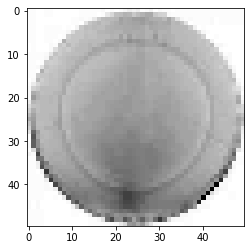

In [9]:
### PRINT PERFROMANCE EVALUATION
categories = ['O','R']
data = [['Performance','SVM','SVM-RBF','KNN','NB'],
        ["Accuracy",round(svm_accuracy,3),round(svm_rbf_accuracy,3),round(knn_accuracy,3),round(nb_accuracy,3)],
        ["Precision",round(svm_precision,3),round(svm_rbf_precision,3),round(knn_precision,3),round(nb_precision,3)],
        ["Recall",round(svm_recall,3),round(svm_rbf_recall,3),round(knn_recall,3),round(nb_recall,3)],
        ["F1 Measure",round(svm_f1_metric,3),round(svm_rbf_f1_metric,3),round(knn_f1_metric,3),round(nb_f1_metric,3)],
        ["Prediction",categories[svm_prediction[0]],categories[svm_rbf_prediction[0]],categories[knn_prediction[0]],categories[nb_prediction[0]]]]

print(tabulate(data, headers='firstrow',tablefmt='fancy_grid'))

### SHOW PREDICTION
waste_classified = xtest[0].reshape(50,50) 
plt.imshow(waste_classified,cmap='gray')
plt.show()

SVM Prediction is  R
SVM-RBF Prediction is  R
KNN Prediction is  R
NB Prediction is  O


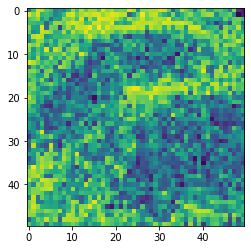

In [17]:
categories = ['O','R']

#Predict another picture
imgpath = "C:\\Users\\User10\\Desktop\\BITU 3973 PSM 1\\Waste Classification Using Instance-Based Algorithm\\download.jpg"

waste_image = cv2.imread(imgpath,0) # value 0 is to turn image into grayscale

try:
    waste_image = cv2.resize(waste_image,(50,50)) # make all images same size
    test_image = np.array(waste_image).flatten() # make full image single area
except Exception as e:
    pass

svm_prediction = svm.predict(test_image.reshape(1,-1))
svm_rbf_prediction = svm_rbf.predict(test_image.reshape(1,-1))
knn_prediction = knn.predict(test_image.reshape(1,-1))
nb_prediction = nb.predict(test_image.reshape(1,-1))

### SHOW PREDICTION
plt.imshow(waste_image)

### Print prediction
print('SVM Prediction is ',categories[svm_prediction[0]])
print('SVM-RBF Prediction is ',categories[svm_rbf_prediction[0]])
print('KNN Prediction is ',categories[knn_prediction[0]])
print('NB Prediction is ',categories[nb_prediction[0]])